In [ ]:
!unzip gender.zip

unzip:  cannot find or open gender.zip, gender.zip.zip or gender.zip.ZIP.


In [ ]:
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv('/content/gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
# Memilih hanya kolom numerik
df_gender = df.select_dtypes(include=['number'])

# Menghitung statistik deskriptif
statistik = df_gender.describe()

# Mengambil statistik yang diperlukan
rata_rata = statistik.loc['mean']
standarDeviasi = statistik.loc['std']
nilaiMinimum = statistik.loc['min']
q1 = df_gender.quantile(0.25)
median = statistik.loc['50%']
q3 = df_gender.quantile(0.75)
nilaiMaksimum = statistik.loc['max']

# Membuat DataFrame untuk hasil
tableStatistikgender = pd.DataFrame({
    'Rata-rata': rata_rata,
    'Standar Deviasi': standarDeviasi,
    'Nilai Minimum': nilaiMinimum,
    'Q1': q1,
    'Median (Q2)': median,
    'Q3': q3,
    'Nilai Maksimum': nilaiMaksimum})

# Menampilkan tabel
print(tableStatistikgender)

                           Rata-rata  Standar Deviasi  Nilai Minimum    Q1  \
long_hair                   0.869626         0.336748            0.0   1.0   
forehead_width_cm          13.181484         1.107128           11.4  12.2   
forehead_height_cm          5.946311         0.541268            5.1   5.5   
nose_wide                   0.493901         0.500013            0.0   0.0   
nose_long                   0.507898         0.499988            0.0   0.0   
lips_thin                   0.493101         0.500002            0.0   0.0   
distance_nose_to_lip_long   0.498900         0.500049            0.0   0.0   

                           Median (Q2)    Q3  Nilai Maksimum  
long_hair                          1.0   1.0             1.0  
forehead_width_cm                 13.1  14.0            15.5  
forehead_height_cm                 5.9   6.4             7.1  
nose_wide                          0.0   1.0             1.0  
nose_long                          1.0   1.0             1.0

In [ ]:
print(df.columns)

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder(categories=[['Male', 'Female']])
df['gender'] = encoder.fit_transform(df[['gender']])

In [ ]:
df['gender'].value_counts()

,count
gender,
1.0,2501
0.0,2500


In [ ]:
df.select_dtypes(include=['int64', 'float64']).head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0.0
1,0,14.0,5.4,0,0,1,0,1.0
2,0,11.8,6.3,1,1,1,1,0.0
3,0,14.4,6.1,0,1,1,1,0.0
4,1,13.5,5.9,0,0,0,0,1.0
5,1,13.0,6.8,1,1,1,1,0.0
6,1,15.3,6.2,1,1,1,0,0.0
7,0,13.0,5.2,0,0,0,0,1.0
8,1,11.9,5.4,1,0,1,1,1.0
9,1,12.1,5.4,0,0,0,0,1.0


In [ ]:
df_gender = {}

df_gender['Jumlah Record'] = df.shape[0]
df_gender['Jumlah Attribute'] = df.shape[1]
df_gender['Nama Attribute'] = df.columns.tolist()
df_gender['Jumlah Attribute Dengan Tipe Angka'] = df.select_dtypes(include=['int64', 'float64']).shape[1]

dict_gender = list(df_gender.keys())

table = PrettyTable()
table.add_column(dict_gender[0], [df_gender['Jumlah Record']])
table.add_column(dict_gender[1], [df_gender['Jumlah Attribute']])
table.add_column(dict_gender[2], ['\n'.join(df_gender['Nama Attribute'])])
table.add_column(dict_gender[3], [df_gender['Jumlah Attribute Dengan Tipe Angka']])
print(table)

+---------------+------------------+---------------------------+------------------------------------+
| Jumlah Record | Jumlah Attribute |       Nama Attribute      | Jumlah Attribute Dengan Tipe Angka |
+---------------+------------------+---------------------------+------------------------------------+
|      5001     |        8         |         long_hair         |                 8                  |
|               |                  |     forehead_width_cm     |                                    |
|               |                  |     forehead_height_cm    |                                    |
|               |                  |         nose_wide         |                                    |
|               |                  |         nose_long         |                                    |
|               |                  |         lips_thin         |                                    |
|               |                  | distance_nose_to_lip_long |                  

In [ ]:
# Memilih hanya kolom bertipe objek
df_gender = df.select_dtypes(include=['object'])

# Menghitung jumlah label unik untuk setiap kolom
jumlah_label = df_gender.nunique()

# Membuat tabel menggunakan PrettyTable
table = PrettyTable()

# Menambahkan kolom ke tabel
table.field_names = ["Nama Atribut", "Jumlah Label"]

# Menambahkan data jumlah label unik ke dalam tabel
for column, count in jumlah_label.items():
    table.add_row([column, count])

print(table)

+--------------+--------------+
| Nama Atribut | Jumlah Label |
+--------------+--------------+
+--------------+--------------+


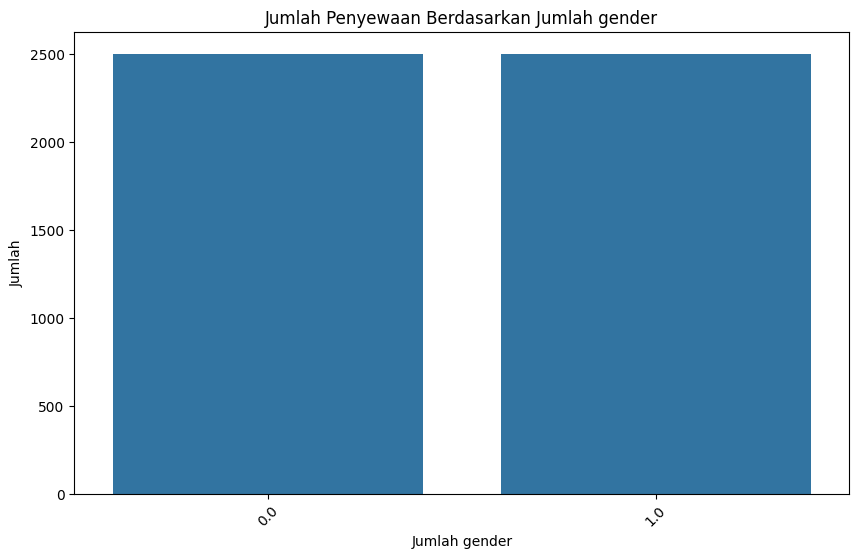

In [ ]:
# Menghitung jumlah setiap kategori gender
df_gender = df['gender'].value_counts().reset_index()
df_gender.columns = ['gender', 'count']

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(data=df_gender, x='gender', y='count')
plt.title('Jumlah Penyewaan Berdasarkan Jumlah gender')
plt.xlabel('Jumlah gender')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


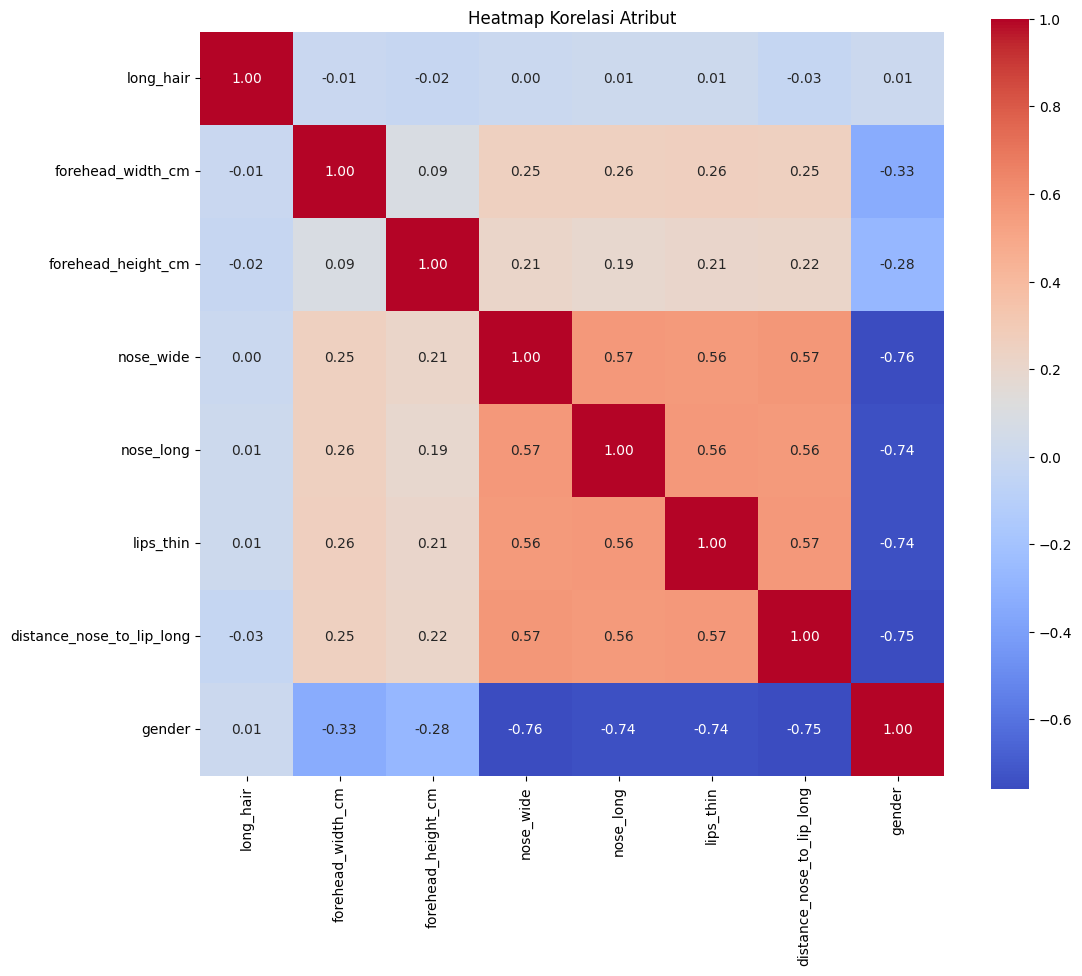

In [ ]:
# Memilih hanya kolom numerik
kolomNumerik = df.select_dtypes(include=['float64', 'int64'])

# Menghitung korelasi antar atribut
korelasi = kolomNumerik.corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(korelasi, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Heatmap Korelasi Atribut')
plt.show()


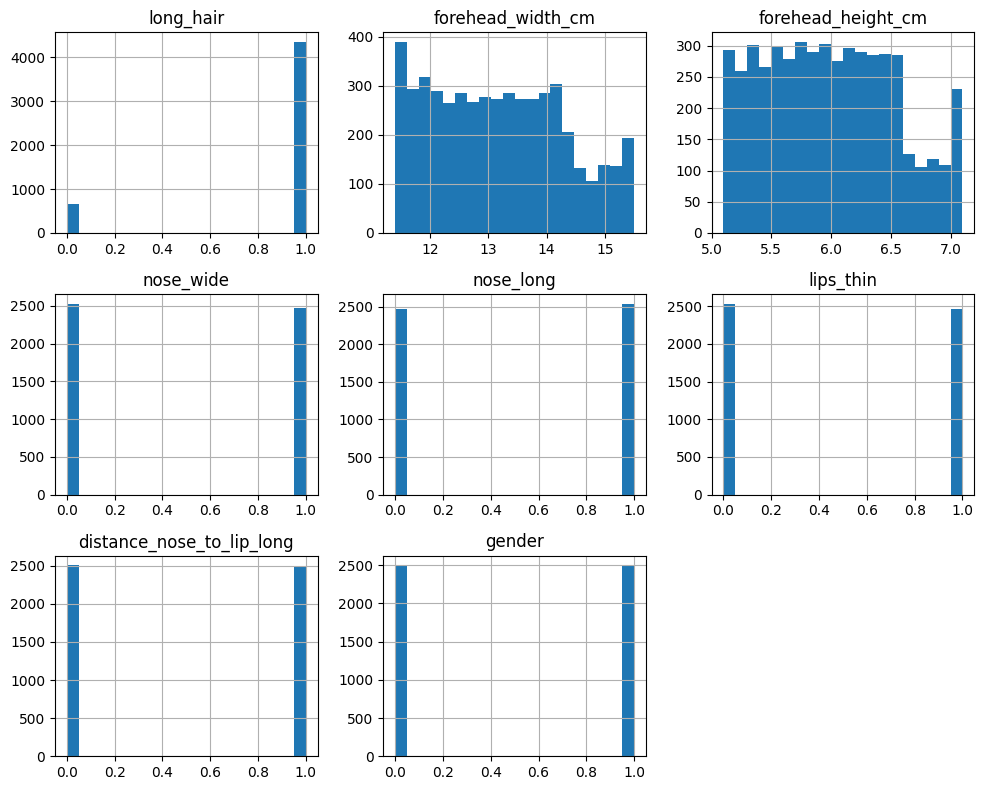

In [ ]:
# Buat histogram untuk semua fitur numerik
df.hist(figsize=(10, 8), bins=20)

# Tampilkan histogram
plt.tight_layout()
plt.show()

# **DATA PREPROCESSING**

## **1.DATA CLEANING**

**Data Cleaning, sebelum melakukan data cleaning lakukan pengecekan missing value terlebih dahulu**

- **Handling missing value (jika ada)**

- **Handling duplicate value (jika ada)**

- **Handling outlier (jika ada)**

In [ ]:
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
df = pd.read_csv('/content/gender_classification_v7.csv')

In [ ]:
#melihat jumlah missing value di masing-masing kolom
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


Tidak ada data yang missing value

lalu lanjut cek data yang duplikat dengan df.duplicated().sum() yang akan menghitung berapa banyak data yang duplikat.

In [ ]:
# Melihat jumlah duplicate value
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  1768


menghapus nilai duplikat kita dapat langsung menggunakan perintah drop_duplicates. Kita juga menggunakan perintah inplace=True yang artinya kita akan menimpa DataFrame yang sudah ada.

In [ ]:
# Handling duplicate value
df.drop_duplicates(inplace=True)
# Melihat Jumlah duplicate value sekarang
print('Jumlah nilai duplikat pada data sekarang: ',
df.duplicated().sum())

Jumlah nilai duplikat pada data sekarang:  0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder(categories=[['Male', 'Female']])
df['gender'] = encoder.fit_transform(df[['gender']])

Sebelum melakukan handling outlier harus dilakukan dulu pengecekan outlier menggunakan boxplot seperti code dibawah ini

<Axes: ylabel='gender'>

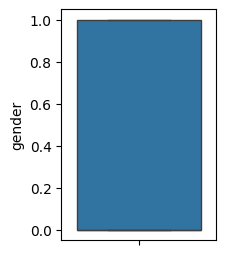

In [ ]:
fig, ax = plt.subplots(figsize=(2,3)) #untuk frame/figure
sns.boxplot(df['gender']) #untuk boxplot

In [ ]:
import numpy as np
from scipy import stats

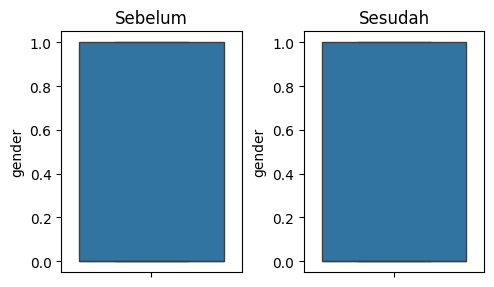

In [ ]:
#sebelum handling oulier
fig, axes = plt.subplots(1,2, figsize=(5,3))
plt.tight_layout()
sns.boxplot(df['gender'],orient='v',ax=axes[0])
axes[0].title.set_text("Sebelum")
# Menghitung Z-Score
df['gender'] = df['gender'][(np.abs(stats.zscore(df['gender'])) <
3)]
#setelah handling oulier
sns.boxplot(df['gender'],orient='v',ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()

Ini hasil dari handling outlier menggunakan metode Z-Score di kolom Rating, yang dimana pada kolom tersebut sudah tersusun maka hasil sebelum dan sesudahnya adalah sama

## **2.DATA TRANSFORMATION**

### **1.Normalisasi**
Saat normalisasi ini kita menggunakan teknik penskalaan sehingga memiliki rentang dari [0, 1]

Disini kita menggunakan metode
Min-Max Scalling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.dtypes

,0
long_hair,int64
forehead_width_cm,float64
forehead_height_cm,float64
nose_wide,int64
nose_long,int64
lips_thin,int64
distance_nose_to_lip_long,int64
gender,float64


In [ ]:
min_max = MinMaxScaler()
df_wide = df.copy()
df_wide[['nose_wide', 'nose_long', 'gender']] = min_max.fit_transform(df_wide[['nose_wide', 'nose_long', 'gender']])

In [ ]:
df_wide['nose_wide'].min()

0.0

In [ ]:
df_wide['nose_wide'].max()

1.0

Setelah itu untuk kita mengetahui data yang sudah kita lakukan normalisasi kita dapat menggunakan DataFrame ['nama kolom yang sudah di normalisasi'].min() / max() . Dari output kode diatas kita dapat melihat bahwa nilai max bernilai 1 dan min bernilai 0, artinya penskalaan data dengan normalisasi sudah berhasil.

### **Standarisasi**

- Standarisasi merupakan proses menjadikan data memiliki rata-rata 0 dan
standar deviasi 1.

- Lalu import library standar scaler dari preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
df_long = df.copy()
df_long[['nose_wide', 'nose_long', 'gender']] = ss.fit_transform(df_long[['nose_wide', 'nose_long', 'gender']])

In [ ]:
df_long['nose_long'].std()

1.0001546910056673

Setelah itu untuk kita mengetahui data yang sudah kita lakukan standarisasi kita dapat menggunakan df['nama kolom yang sudah di standarisasi'].std() . Dari output kode diatas kita dapat melihat bahwa standar deviasi bernilai 1, artinya penskalaan data dengan standarisasi sudah berhasil.

# **Featuring Engineering**

Feature Engineering merupakan sebuah proses untuk mengembangkan dan
memilih suatu fitur atau atribut (features) yang akan digunakan untuk melakukan
analisis data atau dalam melakukan pembuatan sebuah model machine learning.

In [ ]:
# 1. Membuat fitur `forehead_ratio`
df['forehead_ratio'] = df['forehead_width_cm'] / df['forehead_height_cm']

In [ ]:
# 2. Membuat interaksi biner
# Interaksi antara rambut panjang dan hidung lebar
df['hair_nose_interaction'] = df['long_hair'] * df['nose_wide']

In [ ]:
# Interaksi antara hidung panjang dan bibir tipis
df['nose_lips_interaction'] = df['nose_long'] * df['lips_thin']

In [ ]:
# Interaksi antara hidung panjang dan jarak hidung-ke-bibir panjang
df['nose_lip_distance_interaction'] = df['nose_long'] * df['distance_nose_to_lip_long']

In [ ]:
# Menampilkan hasil akhir DataFrame dengan fitur baru
print(df)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4986          1               11.7                 6.1          1          1   
4990          1               12.6                 5.7          0          0   
4992          1               14.1                 7.0          1          1   
4993          1               11.6                 5.9          0          0   
4995          1               12.3                 6.9          0          1   

      lips_thin  distance_nose_to_lip_l

In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_ratio,hair_nose_interaction,nose_lips_interaction,nose_lip_distance_interaction
0,1,11.8,6.1,1,0,1,1,0.0,1.934426,1,0,0
1,0,14.0,5.4,0,0,1,0,1.0,2.592593,0,0,0
2,0,11.8,6.3,1,1,1,1,0.0,1.873016,0,1,1
3,0,14.4,6.1,0,1,1,1,0.0,2.360656,0,1,1
4,1,13.5,5.9,0,0,0,0,1.0,2.288136,0,0,0


### **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Subset feature dan target
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
#Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
#Melihat Dimensi Data X, y Train dan Test
print("Dimensi X_train :", X_train.shape)
print("Dimensi X_test  :", X_test.shape)
print("Dimensi Y_train :", Y_train.shape)
print("Dimensi Y_test  :", Y_test.shape)

Dimensi X_train : (2586, 11)
Dimensi X_test  : (647, 11)
Dimensi Y_train : (2586,)
Dimensi Y_test  : (647,)


In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan `df` adalah DataFrame yang sudah dilengkapi feature engineering
# Pisahkan fitur (X) dan label target (y)
X = df.drop('gender', axis=1)  # Fitur
y = df['gender']  # Label target

# Bagi dataset menjadi training dan test set dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Opsional) Jika Anda ingin validation set, bisa membagi X_train lagi:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model
model = RandomForestClassifier()

# Latih model dengan training set
model.fit(X_train, y_train)

# Prediksi pada validation set untuk mengevaluasi dan menyetel hyperparameter (opsional)
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Evaluasi akhir pada test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.9629057187017002
Test Accuracy: 0.955177743431221


In [ ]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['0', '1']) # Explicitly define target_names
print(classification_rep)
print(f"Accuracy: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       339
           1       0.95      0.96      0.96       308

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647

Accuracy: 0.96


In [ ]:
# Muat model (sesuaikan dengan format yang digunakan)
model = tf.keras.models.load_model("gender_model_directory.keras")
# atau
# model = tf.keras.models.load_model("gender_model.h5")

# Konversi ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model dalam format .tflite
with open("gender_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke .tflite")


Saved artifact at '/tmp/tmp8y_me9m8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134867129642224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134867108664016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134867108665600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134867005759984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134867129644512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134866873281600: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil dikonversi ke .tflite
